### This notebook contains a selection of useful functions for analysing and visualising MD trajectories.  We rely heavily on [MDAnalysis](https://www.mdanalysis.org) and [mdtraj](https://www.mdtraj.org/1.9.8.dev0/index.html) for optimised analysis routines that operate on trajectory data

In [2]:
# visualise a trajectory generated from running the pure MD simulation

import MDAnalysis as mda
import nglview as nv
import numpy as np
from MDAnalysis import transformations


output_dir = "junk/pure_md/"

u = mda.Universe(f"{output_dir}/minimised_system.pdb", f"{output_dir}/output.dcd")

view = nv.show_mdanalysis(u)

view.add_unitcell()
view.control.rotate(
    mda.lib.transformations.quaternion_from_euler(
        -np.pi/2, np.pi/3, np.pi/6, 'rzyz').tolist())
view.control.zoom(-0.3)
view

/home/jhm72/miniconda3/envs/mace-mlmm/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


NGLWidget(max_frame=99)

In [18]:
# Visualise a periodic simulation, using MDA to wrap coordinates

u = mda.Universe("sim_data/waterbox/waterbox.pdb", "sim_data/waterbox/output.dcd")
u.atoms.guess_bonds()
# workflow = [transformations.unwrap(u.atoms)]
prot = u.select_atoms("resname MOL")
ag = u.atoms
print(len(ag))
# we will use mass as weights for the center calculation
workflow = (transformations.unwrap(ag),
                   transformations.center_in_box(prot, center='geometry'),
                   transformations.wrap(ag, compound='fragments'))
u.trajectory.add_transformations(*workflow)




view = nv.show_mdanalysis(u)

view.add_unitcell()
view.control.rotate(
    mda.lib.transformations.quaternion_from_euler(
        -np.pi/2, np.pi/3, np.pi/6, 'rzyz').tolist())
view.control.zoom(-0.3)
view

192


/home/jhm72/miniconda3/envs/mace-mlmm/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


NGLWidget(max_frame=2175)

In [9]:
# plot rmsd using the first frame as reference
R = mda.analysis.rms.RMSD(u, select="resname UNK", ref_frame=0)
# plot the results
R.run()

/home/jhm72/miniconda3/envs/mace-mlmm/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:718: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


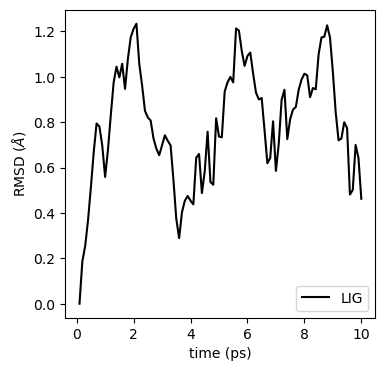

In [11]:
import matplotlib.pyplot as plt
rmsd = R.rmsd.T   # transpose makes it easier for plotting
time = rmsd[1]
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(time, rmsd[2], 'k-',  label="LIG")
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
fig.savefig("rmsd_all_CORE_LID_NMP_ref1AKE.pdf")

Text(0, 0.5, 'density (g/cm$^3$)')

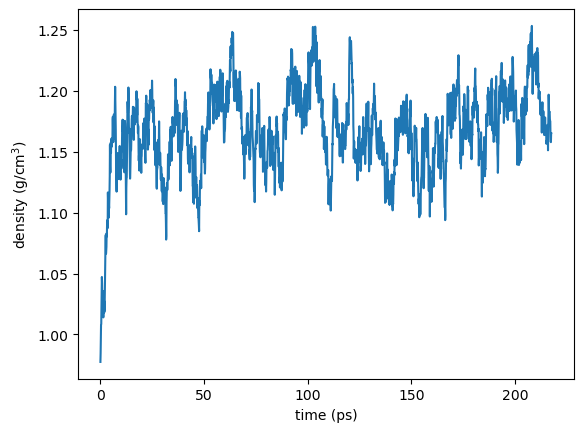

In [17]:
# plot densities of a periodic NPT simulation
import mdtraj as md
def compute_density(traj, top):


    traj = md.load(traj, top=top)
            # extract timesteps
    # note this conversion is specific to the writeout frequency and timestep, i.e. every 100 steps = 0.1 ps
    timesteps = traj.time / 10
    density =  md.density(traj) / 1000
    return timesteps, density

traj = "sim_data/waterbox/output.dcd"
top = "sim_data/waterbox/waterbox.pdb"

timesteps, density = compute_density(traj, top)
plt.plot(timesteps, density)
plt.xlabel("time (ps)")
plt.ylabel(r"density (g/cm$^3$)")